In [1]:
from torchvision import transforms, datasets
import torchvision
import torch
import time
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Create a transform function for Skin Cancer dataset
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [4]:
# Load the dataset from the local directory
train_dir = '/skin_cancer_dataset/train-20240324T151905Z-001/train'
test_dir = '/skin_cancer_dataset/test-20240324T151902Z-001/test'
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform_train)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform_test)

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: '/skin_cancer_dataset/train-20240324T151905Z-001/train'

In [4]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 2077
    Root location: C:/Users/gtoma/AI_Development/UEM_Master_AI_07042025/UEM_Trabajo/Sesiones_UEM/Manuel_Garcia_VISION/Transfer_Learning/VisArt/Computer_Vision_1/train/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [5]:
train_dataset.classes, train_dataset.class_to_idx

(['benign', 'malignant'], {'benign': 0, 'malignant': 1})

In [6]:
type(train_dataset)


torchvision.datasets.folder.ImageFolder

In [7]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 30
    Root location: C:/Users/gtoma/AI_Development/UEM_Master_AI_07042025/UEM_Trabajo/Sesiones_UEM/Manuel_Garcia_VISION/Transfer_Learning/VisArt/Computer_Vision_1/test/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [8]:
test_dataset.classes, test_dataset.class_to_idx

(['benign', 'malignant'], {'benign': 0, 'malignant': 1})

In [9]:
type(test_dataset)

torchvision.datasets.folder.ImageFolder

In [10]:
# Vamos a utilizar ResizeCrop y HorizontalFlip para aumentar el dataset train
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the dataset from the local directory with data augmentation
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform_train)



In [11]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 2077
    Root location: C:/Users/gtoma/AI_Development/UEM_Master_AI_07042025/UEM_Trabajo/Sesiones_UEM/Manuel_Garcia_VISION/Transfer_Learning/VisArt/Computer_Vision_1/train/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [12]:
train_dataset.classes, train_dataset.class_to_idx

(['benign', 'malignant'], {'benign': 0, 'malignant': 1})

In [13]:
type(train_dataset)

torchvision.datasets.folder.ImageFolder

In [14]:
# Vamos a utilizar ResizeCrop y HorizontalFlip para aumentar el dataset test
transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the dataset from the local directory with data augmentation
test_dataset = datasets.ImageFolder(root=train_dir, transform=transform_test)


In [15]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 2077
    Root location: C:/Users/gtoma/AI_Development/UEM_Master_AI_07042025/UEM_Trabajo/Sesiones_UEM/Manuel_Garcia_VISION/Transfer_Learning/VisArt/Computer_Vision_1/train/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [16]:
test_dataset.classes, train_dataset.class_to_idx

(['benign', 'malignant'], {'benign': 0, 'malignant': 1})

In [17]:
type(test_dataset)

torchvision.datasets.folder.ImageFolder

In [18]:
# Vamos a definir el tamaño del batch y el número de workers
batch_size = 32
num_workers = 4
# Create data loaders for training and testing datasets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

# Check the number of batches in the training and testing datasets
print(f"Number of batches in training dataset: {len(train_loader)}")
print(f"Number of batches in testing dataset: {len(test_loader)}")
# Check the size of each batch in the training and testing datasets
for images, labels in train_loader:
    print(f"Batch size in train: {images.size()}")
    break
# Check the size of each batch in the testing dataset
for images, labels in test_loader:
    print(f"Batch size in test: {images.size()}")
    break
# Check the number of classes in the training and testing datasets
print(f"Number of classes in training dataset: {len(train_dataset.classes)}")
print(f"Number of classes in testing dataset: {len(test_dataset.classes)}")


Number of batches in training dataset: 65
Number of batches in testing dataset: 65
Batch size in train: torch.Size([32, 3, 224, 224])
Batch size in test: torch.Size([32, 3, 224, 224])
Number of classes in training dataset: 2
Number of classes in testing dataset: 2


In [19]:
# Vamos a cargar el modelo preentrenado de ResNet18
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import copy
# Load the pre-trained ResNet18 model
model = models.resnet18(weights='DEFAULT')
# Modify the last fully connected layer to match the number of classes in the dataset
num_classes = len(train_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)
# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print(f"Using device: {device}")


Using device: cuda


In [20]:
# Vamos con la funcion de perdida y el optimizador y epochs
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
# Define the number of epochs
num_epochs = 13


In [21]:
# Initialize lists to store training and testing loss and accuracy
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []

In [22]:
# Vamos a entrenar el modelo
start_time = time.time()
print("Starting training...")

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU if available

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = correct / total

    train_loss_list.append(epoch_loss)
    train_acc_list.append(epoch_acc)

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device) # Move data to GPU if available
        model.eval()
        with torch.no_grad():
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(test_loader.dataset)
    epoch_acc = correct / total

    test_loss_list.append(epoch_loss)
    test_acc_list.append(epoch_acc)

    print(f"Test Loss: {epoch_loss:.4f}, Test Accuracy: {epoch_acc:.4f}")

end_time = time.time()
print("Training completed.")
print()
print(f"Training completed in {num_epochs} epochs")
print(f"Final training loss: {train_loss_list[-1]:.4f}")
print(f"Final training accuracy: {train_acc_list[-1]:.4f}")
print()
print(f"Training started at: {time.ctime(start_time)}")
print(f"Training ended at: {time.ctime(end_time)}")
print(f"Training time: {end_time - start_time:.2f} seconds")


Starting training...
Epoch [1/13], Loss: 0.3683, Accuracy: 0.8190
Test Loss: 0.5697, Test Accuracy: 0.8702
Epoch [2/13], Loss: 0.2316, Accuracy: 0.8994
Test Loss: 0.3932, Test Accuracy: 0.9182
Epoch [3/13], Loss: 0.1732, Accuracy: 0.9268
Test Loss: 0.2560, Test Accuracy: 0.9519
Epoch [4/13], Loss: 0.1210, Accuracy: 0.9543
Test Loss: 0.1928, Test Accuracy: 0.9661
Epoch [5/13], Loss: 0.0960, Accuracy: 0.9663
Test Loss: 0.2466, Test Accuracy: 0.9552
Epoch [6/13], Loss: 0.0978, Accuracy: 0.9644
Test Loss: 0.1538, Test Accuracy: 0.9742
Epoch [7/13], Loss: 0.0627, Accuracy: 0.9740
Test Loss: 0.1238, Test Accuracy: 0.9747
Epoch [8/13], Loss: 0.0424, Accuracy: 0.9846
Test Loss: 0.0635, Test Accuracy: 0.9889
Epoch [9/13], Loss: 0.0550, Accuracy: 0.9769
Test Loss: 0.0891, Test Accuracy: 0.9831
Epoch [10/13], Loss: 0.0442, Accuracy: 0.9846
Test Loss: 0.0723, Test Accuracy: 0.9884
Epoch [11/13], Loss: 0.0453, Accuracy: 0.9836
Test Loss: 0.0728, Test Accuracy: 0.9863
Epoch [12/13], Loss: 0.0372, Ac

In [23]:
train_loss_list

[0.3683403540199975,
 0.23155785746223145,
 0.17316059855727203,
 0.12102970322006645,
 0.09598151515123646,
 0.09778481567629152,
 0.06270277435583281,
 0.0424145600567027,
 0.055039169310762956,
 0.04421602449611683,
 0.04533691503659974,
 0.03715867062400153,
 0.049223345704825096]

In [24]:
train_acc_list

[0.8189696677900818,
 0.8993740972556572,
 0.9268175252768416,
 0.954260953298026,
 0.9662975445353876,
 0.9643716899374097,
 0.974000962927299,
 0.9845931632161772,
 0.9768897448242657,
 0.9845931632161772,
 0.9836302359171882,
 0.9870004814636495,
 0.9850746268656716]

In [25]:
test_loss_list

[0.5697072164465385,
 0.3932168923235881,
 0.25604472067216066,
 0.19281328606186546,
 0.2465962279615112,
 0.1538139696039715,
 0.12383649140402682,
 0.06348050955829171,
 0.08913420709255826,
 0.07230666808924804,
 0.07278581077101128,
 0.05924483541218536,
 0.07514749136897989]

In [26]:
test_acc_list

[0.8702455464612422,
 0.9181511795859413,
 0.9518536350505536,
 0.9660568127106404,
 0.9552238805970149,
 0.9742416947520463,
 0.9747231584015407,
 0.9889263360616274,
 0.9831487722676938,
 0.9884448724121329,
 0.9862782859894078,
 0.9891670678863745,
 0.9874819451131439]

In [27]:
# Vamos a guardar el modelo entrenado
model_path = 'resnet18_skin_cancer.pth'
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

Model saved to resnet18_skin_cancer.pth


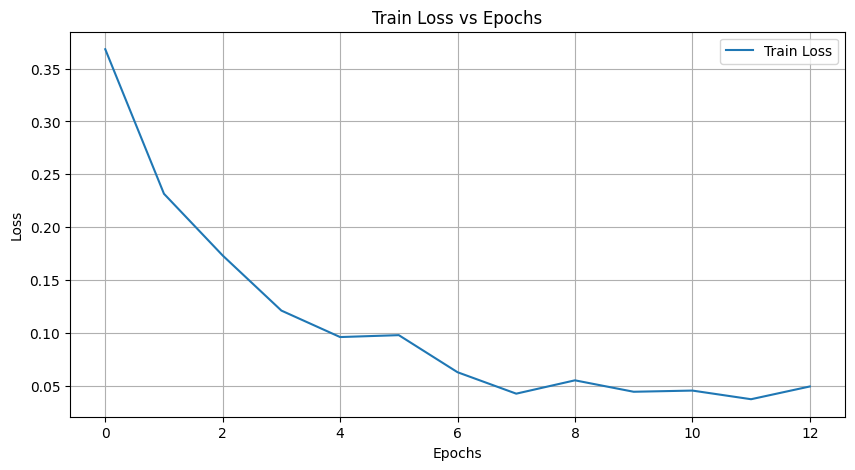

In [28]:
# Vamos a graficar loss vs epochs train
plt.figure(figsize=(10, 5))
plt.plot(train_loss_list, label='Train Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs Epochs')
plt.grid()
plt.show()

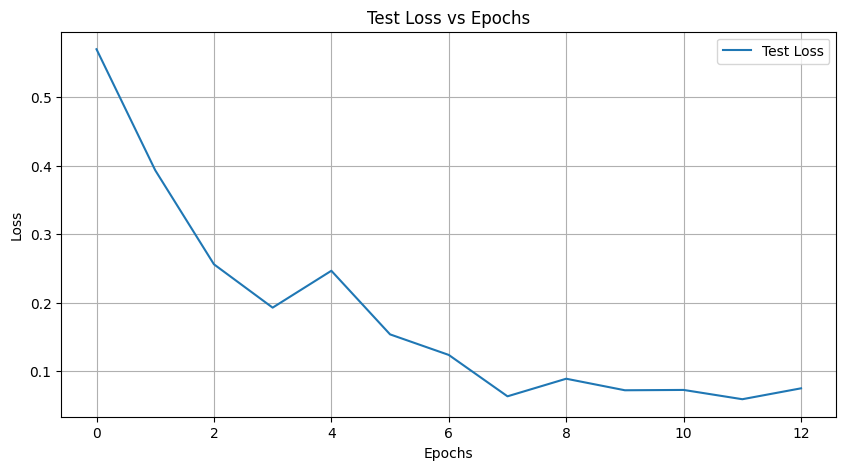

In [29]:
# Vamos a graficar loss vs epochs test
plt.figure(figsize=(10, 5))
plt.plot(test_loss_list, label='Test Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss vs Epochs')
plt.grid()
plt.show()

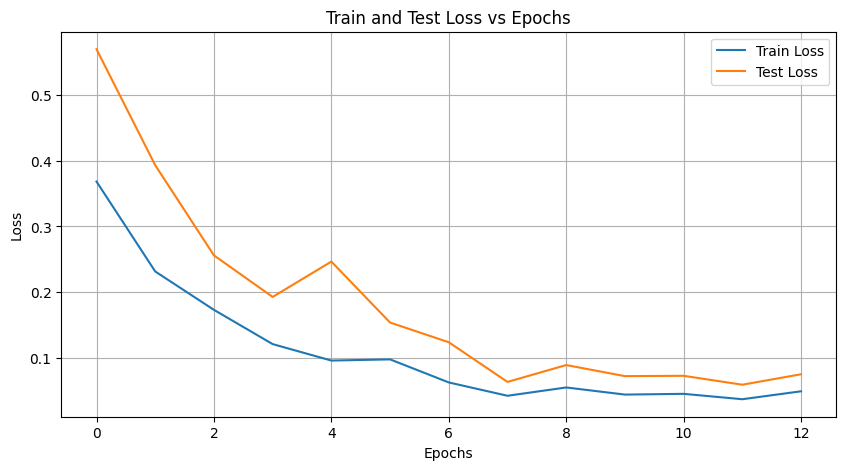

In [30]:
# Vamos a graficar loss vs epochs train y test
plt.figure(figsize=(10, 5))
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss vs Epochs')
plt.grid()
plt.show();


In [31]:
# Vamos a guardar la grafica de loss vs epochs train y test
plt.figure(figsize=(10, 5))
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss vs Epochs')
plt.grid()
plt.savefig('train_test_loss_vs_epochs.png')
plt.close()  # Close the plot to free up memory

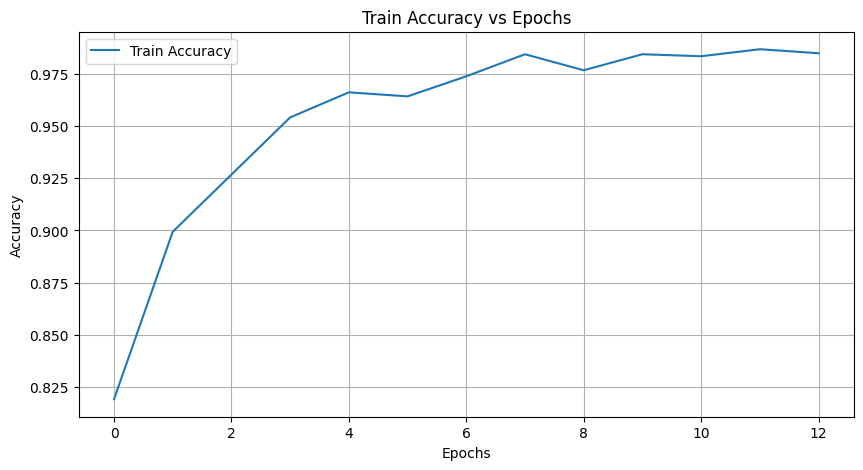

In [32]:
# Vamos a graficar accuracy vs epochs train
plt.figure(figsize=(10, 5))
plt.plot(train_acc_list, label='Train Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Epochs')
plt.grid()
plt.show()

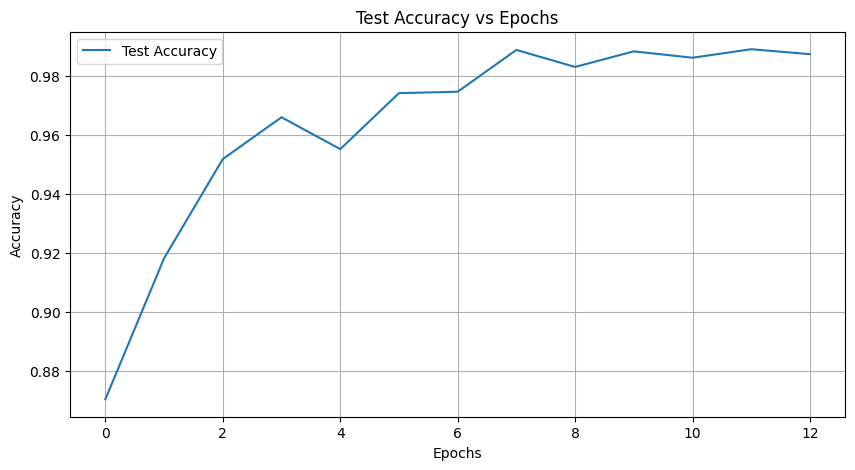

In [33]:
# Vamos a graficar accuracy vs epochs test
plt.figure(figsize=(10, 5))
plt.plot(test_acc_list, label='Test Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Epochs')
plt.grid()
plt.show()


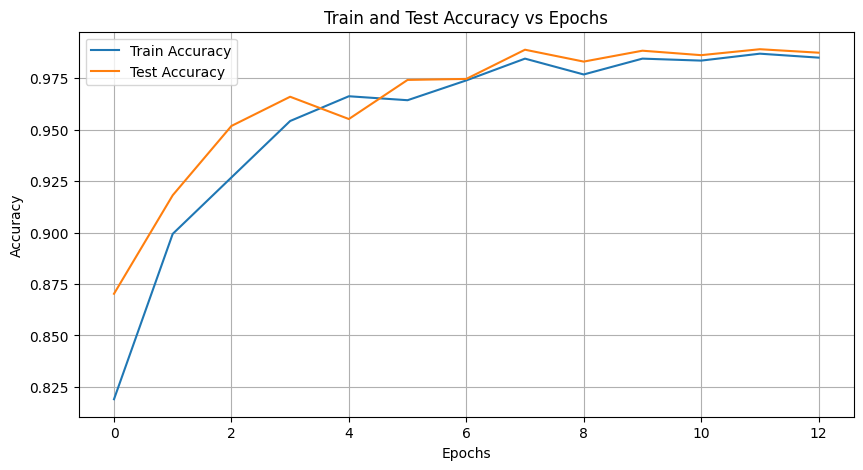

In [34]:
# Vamos a graficar accuracy vs epochs train y test
plt.figure(figsize=(10, 5))
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs Epochs')
plt.grid()
plt.show()

In [35]:
# Vamos a guardar la grafica de accuracy vs epochs train y test
plt.figure(figsize=(10, 5))
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs Epochs')
plt.grid()
plt.savefig('train_test_accuracy_vs_epochs.png')
plt.close()  # Close the plot to free up memory

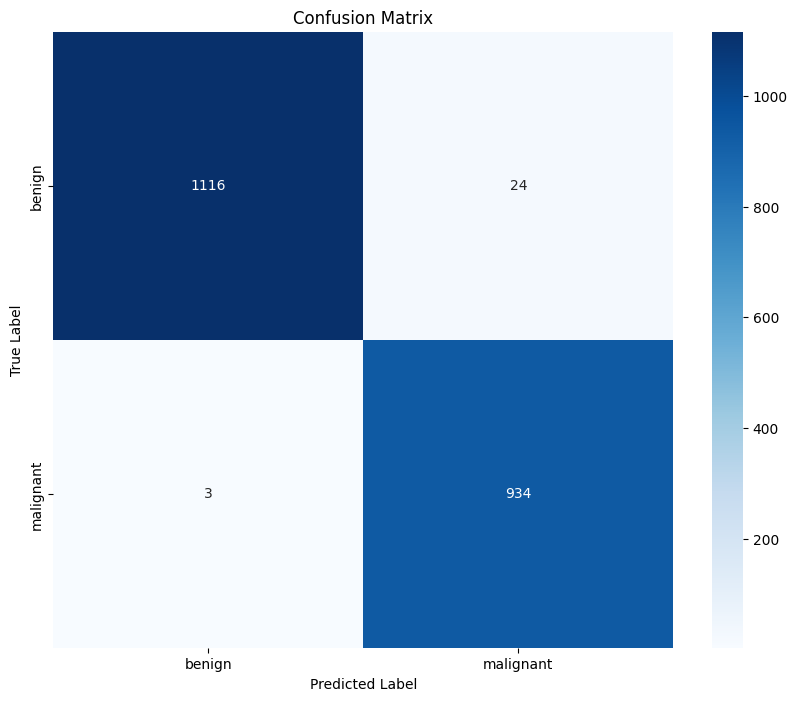

In [36]:
# Vamos a graficar la matriz de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
# Get the model predictions on the test set
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU if available
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())
# Convert to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=train_dataset.classes, columns=train_dataset.classes)
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [37]:
# Save the confusion matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png')
plt.close()  # Close the plot to free up memory


In [38]:
# Vamos a calcular la accuracy, la precision, el recall y el f1-score
from sklearn.metrics import classification_report
# Calculate the classification report
report = classification_report(y_true, y_pred, target_names=train_dataset.classes, output_dict=True)
# Convert to DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()
# Display the classification report
print(report_df)

              precision    recall  f1-score   support
benign         0.997319  0.978947  0.988048  1140.000
malignant      0.974948  0.996798  0.985752   937.000
accuracy       0.987000  0.987000  0.987000     0.987
macro avg      0.986133  0.987873  0.986900  2077.000
weighted avg   0.987227  0.987000  0.987012  2077.000


In [39]:

# Save the classification report to a CSV file
report_df.to_csv('classification_report.csv', index=True)